In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

              unit,na_item,geo\time   Country   2005   2006   2007   2008  \
0   PC_EU27_2020_MPPS_CP,NLPR_HW,AT   Austria  117.5  117.8  116.8  116.3   
1  PC_EU27_2020_MPPS_CP,NLPR_PER,AT   Austria  122.2  121.3  119.5  118.5   
2   PC_EU27_2020_MPPS_CP,NLPR_HW,BE   Belgium  142.8  139.9  138.0  136.2   
3  PC_EU27_2020_MPPS_CP,NLPR_PER,BE   Belgium  133.6  132.1  130.4  127.9   
4   PC_EU27_2020_MPPS_CP,NLPR_HW,BG  Bulgaria   37.6   37.5   38.8   39.5   

    2009   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  117.5  115.6  115.1  118.0  117.9  118.1  119.7  119.5  117.5  117.8   
1  118.3  115.7  115.6  118.1  117.4  117.0  117.4  117.8  115.8  116.5   
2  136.8  138.0  134.0  135.2  134.7  136.1  136.8  136.5  134.0  133.5   
3  128.7  130.4  128.0  130.2  130.3  131.5  131.7  130.9  129.6  129.3   
4   40.1   41.9   42.9   44.1   42.9   44.1   44.5   45.8   45.9   47.2   

    2019   2020  Unnamed: 18  
0  115.9  117.4          NaN  
1  115.5  114.5         

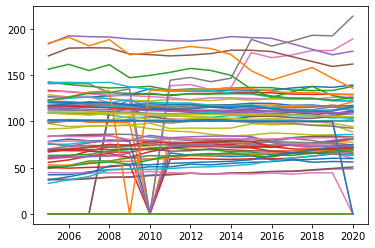

[[ 1.     0.259  0.134  0.511  0.137  0.148  0.41   0.292  0.078  0.019
   0.04   0.131  0.037  0.036 -0.399 -0.405 -0.216 -0.314  0.137  0.052
   0.238  0.247 -0.421 -0.406  0.009]
 [ 0.259  1.     0.712  0.624 -0.823 -0.813 -0.294 -0.456 -0.625 -0.737
  -0.876 -0.817 -0.893 -0.887  0.56   0.508  0.752  0.727  0.801  0.765
   0.592  0.615 -0.488 -0.379 -0.797]
 [ 0.134  0.712  1.     0.674 -0.657 -0.62  -0.721 -0.821 -0.482 -0.531
  -0.582 -0.482 -0.714 -0.708  0.414  0.556  0.809  0.692  0.588  0.625
   0.168  0.166 -0.361 -0.28  -0.733]
 [ 0.511  0.624  0.674  1.    -0.334 -0.339 -0.153 -0.33  -0.439 -0.441
  -0.3   -0.203 -0.456 -0.438 -0.084 -0.093  0.405  0.404  0.566  0.52
   0.065  0.086 -0.555 -0.448 -0.602]
 [ 0.137 -0.823 -0.657 -0.334  1.     0.995  0.556  0.625  0.744  0.865
   0.945  0.888  0.96   0.953 -0.857 -0.807 -0.798 -0.794 -0.61  -0.664
  -0.391 -0.409  0.112  0.001  0.683]
 [ 0.148 -0.813 -0.62  -0.339  0.995  1.     0.523  0.605  0.766  0.883
   0.94   0.892  0.

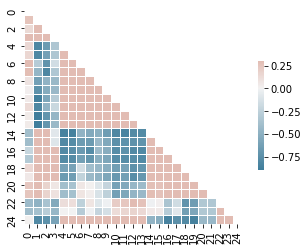

TIME
Belgium                                             37.010714
Bulgaria                                            40.826786
Czechia                                             40.564286
Denmark                                             33.721429
Germany (until 1990 former territory of the FRG)    35.226786
Estonia                                             38.528571
Ireland                                             35.746429
Greece                                              42.037500
Spain                                               38.026786
France                                              37.514286
Croatia                                             39.832143
Italy                                               37.283929
Cyprus                                              39.546429
Latvia                                              38.919643
Lithuania                                           38.498214
Luxembourg                                          37.339286
Hun

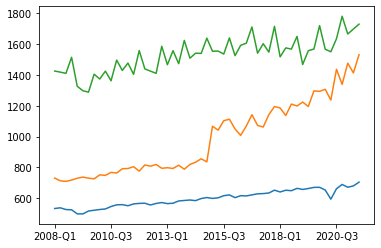

In [2]:
# %%
#coding utf8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# %%
def load_data():
    args = []
    prod_df = pd.read_csv('../data/productivity.csv')
    prod_new_df = pd.read_csv('../data/productivity_new.csv')
    sentiment_df = pd.read_csv('../data/sentiment.csv')
    hours_worked_df = pd.read_csv('../data/lfsa_ewhun2_1_Data.csv')
    productivity_df = pd.read_csv('../data/GDP_per_quarter.csv') 
    unem_df = pd.read_csv('../data/unem.csv')
    covid_df = pd.read_csv('../data/DataPerWeek.csv')
    unem_df.fillna(0)
    productivity_df.fillna(0)
    sentiment_df.fillna(0)
    prod_df.fillna(0)
    covid_df.fillna(0)
    args += [prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df]
    return args

# %%
args = load_data()
prod_df, sentiment_df, hours_worked_df, prod_new_df, productivity_df, unem_df, covid_df = args
for i in np.linspace(2005, 2020, 16, endpoint=True):
    prod_df[[str(int(i))]] = prod_df[[str(int(i))]].apply(pd.to_numeric, errors="coerce")
print(prod_df.head(), sentiment_df.head(), hours_worked_df.head(), prod_new_df.head(), productivity_df.head(), unem_df.head(), covid_df.head())

#%%
prod_data = prod_df.iloc[0:71, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float64).T
time_data = np.repeat(np.array([np.linspace(2005, 2020, 16)]).transpose(), 71, 1)
plt.plot(time_data, prod_data)
plt.show()

#%%
corr = np.round(np.corrcoef(prod_df.iloc[0:25, 2:-1].replace(np.nan, 0).to_numpy(dtype = np.float16)), 3)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(corr)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
#%%
prod_df.head(), productivity_df.head()

#%%
def load_df(file_name):
    df = pd.read_excel(file_name, sheet_name='Sheet 1')
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    df.replace(':', np.nan, inplace=True)
    df.index = df.iloc[:, 0]
    df.drop(df.columns[[0]], axis=1, inplace=True)
    for i in df.columns[:]:
        df[i] = df[i].apply(pd.to_numeric, errors="coerce")
    df.interpolate(method='linear', inplace=True, axis = 1)
    return df

def create_per_employeer(GDP_df, HW_df, employees_df):
    ''' This is a function to create a dataframe with the per-employee GDP and per hour worked '''
    cols =(list(set(GDP_df.columns) and set(employees_df.columns) and set(HW_df.columns)))
    cols.sort()
    idx = cols.pop()
    per_employee_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    per_HW_df = pd.DataFrame(index=GDP_df.index, columns=cols)
    for i in cols:
        per_employee_df[i] = GDP_df[i]/employees_df[i]
        per_HW_df[i] = per_employee_df[i]/HW_df[i]
    return per_employee_df, per_HW_df

GDP_df =  load_df('../data/GDP_per_quarter_2.xlsx') * 1e6
HW_df = load_df('../data/hours_worked.xlsx')
employees_df = load_df('../data/Employees.xlsx') * 1e3
per_employee_df, per_HW_df = create_per_employeer(GDP_df, HW_df, employees_df)

print(HW_df.mean(axis=1), HW_df.std(axis=1))

per_HW_df.iloc[[4,6,15], :].T.plot(legend = False)
print(per_HW_df.index)
#%%
#reg = LinearRegression().fit(np.linspace(0, len(HW_df.columns), len(HW_df.columns), endpoint=False).reshape(-1, 1), HW_df.iloc[:, 1]

In [21]:
inf = pd.read_csv('../data/Quarterly_infilation.csv')
infilation = pd.DataFrame(inf)
infilation_new =infilation.drop(['SUBJECT', 'MEASURE','FREQUENCY','Flag Codes'], axis=1)
infilation_new

,LOCATION,INDICATOR,TIME,Value
0,AUT,CPI,2000-Q1,1.576597
1,AUT,CPI,2000-Q2,2.111587
2,AUT,CPI,2000-Q3,2.858183
3,AUT,CPI,2000-Q4,2.828739
4,AUT,CPI,2001-Q1,2.780696
...,...,...,...,...
2283,LTU,CPI,2020-Q4,0.527013
2284,LTU,CPI,2021-Q1,0.833219
2285,LTU,CPI,2021-Q2,3.235482
2286,LTU,CPI,2021-Q3,5.414587


In [22]:
df = infilation_new.pivot_table('Value', ['LOCATION', 'INDICATOR'], 'TIME')
df

,TIME,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,2002-Q2,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4
LOCATION,INDICATOR,,,,,,,,,,,,,,,,,,,,,
AUT,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,1.965924,1.785135,...,1.394612,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848
BEL,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,2.735005,1.343232,...,1.162466,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534
CHE,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,0.561760,0.689405,...,0.259324,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084
CZE,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,3.841001,2.428256,...,2.836432,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128
DEU,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,1.998463,1.294745,...,1.466837,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284
DNK,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,2.503237,2.258202,...,0.421804,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168
ESP,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,2.503155,3.425096,...,0.312410,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760
EST,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,4.323878,4.175705,...,2.199367,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728
FIN,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,1.964133,1.388619,...,0.947235,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865


In [33]:
def country_code_to_name(df):
    df = df.rename({'AUT': 'Austria'})
    df = df.rename({'BEL': 'Belgium'})
    df = df.rename({'DEU': 'Germany'})
    df = df.rename({'ESP': 'Spain'})
    df = df.rename({'EST': 'Estonia'})
    df = df.rename({'FIN': 'Finland'})
    df = df.rename({'FRA': 'France'})
    df = df.rename({'GRC': 'Greece'})
    df = df.rename({'IRL': 'Ireland'})
    df = df.rename({'ITA': 'Italy'})
    df = df.rename({'LTU': 'Lithuania'})
    df = df.rename({'LUX': 'Luxembourg'})
    df = df.rename({'LVA': 'Latvia'})
    df = df.rename({'PRT': 'Portugal'})
    df = df.rename({'NLD': 'Netherlands'})
    df = df.rename({'SVK': 'Slovakia'})
    df = df.rename({'SVN': 'Slovenia'})
    df = df.rename({'ISL': 'Iceland'})
    df = df.rename({'GBR': 'United Kingdom'})
    df = df.rename({'CHE': 'Switzerland'})
    df = df.rename({'CZE': 'Cezch Republic'})
    df = df.rename({'DNK': 'Denmark'})
    df = df.rename({'HUN': 'Hungary'})
    df = df.rename({'NOR': 'Norway'})
    df = df.rename({'POL': 'Poland'})
    df = df.rename({'SWE': 'Sweden'})
    return df


#df.reset_index(inplace=True)
df

TIME,LOCATION,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Infilation
0,Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,...,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848,1.827017
1,Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,...,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534,1.767322
2,Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,...,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084,0.110816
3,Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,...,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128,2.128356
4,Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,...,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284,1.308379
5,Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,...,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168,1.331685
6,Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,...,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760,1.230464
7,Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,...,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728,2.534528
8,Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,...,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865,1.340303
9,France,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,...,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014,1.118332


In [24]:
per_HW_df.reset_index(inplace=True) 

In [ ]:
per_HW_df.drop([1,12,17,31,34,35,36,37,32,33,22,10],inplace=True)
per_HW_df.reset_index(inplace=True)

In [26]:
per_HW = per_HW_df.drop(['index'],axis=1)

In [27]:
per_HW_prod = per_HW.reindex([15,0,24,1,3,2,7,4,20,8,25,6,13,5,22,9,11,12,10,14,23,16,17,19,18,21])

per_HW_prod.reset_index(inplace = True)

In [28]:
per_HW_pro = per_HW_prod.drop(['index'],axis = 1)
per_HW_pro

,level_0,TIME,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,...,2019-Q2,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3
0,15,Austria,537.344956,563.244566,549.679923,574.753142,535.440455,548.677465,546.810112,583.284671,...,712.706775,706.655983,745.302950,698.560442,659.720954,696.998266,727.433366,689.959372,753.029010,755.286594
1,0,Belgium,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,...,781.186857,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452
2,24,Switzerland,NaN,785.331876,790.029909,832.459651,799.153501,804.652910,820.638052,854.089406,...,1182.727234,1207.948806,1232.905207,1201.968611,1177.466494,1218.527796,1230.993401,1173.572216,1231.652777,1252.826018
3,1,Czechia,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,...,327.919628,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816
4,3,Germany (until 1990 former territory of the FRG),533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,...,662.946576,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582
5,2,Denmark,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,...,922.540572,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282
6,7,Spain,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,...,508.530716,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635
7,4,Estonia,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,...,330.497382,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094
8,20,Finland,579.350013,586.306544,570.942422,621.474505,562.710294,566.491187,561.264723,623.490623,...,744.788131,724.574777,796.554815,746.155982,728.608518,733.526419,814.915430,786.671414,812.148491,813.004471
9,8,France,568.928419,571.953573,549.212748,573.509524,554.414509,556.772397,541.990617,584.201462,...,688.967836,676.998156,706.971493,659.278661,605.976591,667.280269,699.233322,692.946415,697.028246,691.564656


In [29]:
per_HW_pro['Average_Productivity']=per_HW_pro.iloc[:,1:56].mean(axis=1,skipna=True)
per_HW_pro = per_HW_pro.set_index('TIME')
per_HW_pro

C:\Users\ISAACE~1\AppData\Local\Temp/ipykernel_10632/862062982.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  per_HW_pro['Average_Productivity']=per_HW_pro.iloc[:,1:56].mean(axis=1,skipna=True)


,level_0,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,Average_Productivity
TIME,,,,,,,,,,,,,,,,,,,,,
Austria,15,537.344956,563.244566,549.679923,574.753142,535.440455,548.677465,546.810112,583.284671,546.040840,...,706.655983,745.302950,698.560442,659.720954,696.998266,727.433366,689.959372,753.029010,755.286594,638.293471
Belgium,0,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,...,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452,707.767975
Switzerland,24,NaN,785.331876,790.029909,832.459651,799.153501,804.652910,820.638052,854.089406,860.023250,...,1207.948806,1232.905207,1201.968611,1177.466494,1218.527796,1230.993401,1173.572216,1231.652777,1252.826018,1076.055141
Czechia,1,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,...,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816,267.622424
Germany (until 1990 former territory of the FRG),3,533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,...,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582,595.379758
Denmark,2,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,...,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282,827.044926
Spain,7,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,...,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635,470.142974
Estonia,4,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,...,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094,246.184119
Finland,20,579.350013,586.306544,570.942422,621.474505,562.710294,566.491187,561.264723,623.490623,577.384773,...,724.574777,796.554815,746.155982,728.608518,733.526419,814.915430,786.671414,812.148491,813.004471,677.186683


In [30]:
per_HW_pro = per_HW_pro.rename(index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
per_HW_pro

,level_0,2008-Q1,2008-Q2,2008-Q3,2008-Q4,2009-Q1,2009-Q2,2009-Q3,2009-Q4,2010-Q1,...,2019-Q3,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,Average_Productivity
TIME,,,,,,,,,,,,,,,,,,,,,
Austria,15,537.344956,563.244566,549.679923,574.753142,535.440455,548.677465,546.810112,583.284671,546.040840,...,706.655983,745.302950,698.560442,659.720954,696.998266,727.433366,689.959372,753.029010,755.286594,638.293471
Belgium,0,611.402642,650.509000,611.189001,643.449734,609.283943,621.255617,609.988497,665.392445,616.821551,...,751.422297,826.953821,757.363015,697.283950,740.861798,818.986723,798.488287,832.346996,810.219452,707.767975
Switzerland,24,NaN,785.331876,790.029909,832.459651,799.153501,804.652910,820.638052,854.089406,860.023250,...,1207.948806,1232.905207,1201.968611,1177.466494,1218.527796,1230.993401,1173.572216,1231.652777,1252.826018,1076.055141
Czechia,1,213.788847,237.927883,249.455512,234.787323,200.832967,220.343577,232.028277,237.178025,219.683756,...,333.933911,343.652461,311.266007,294.832550,324.634480,335.597217,319.635254,358.684483,362.109816,267.622424
Germany,3,533.261691,537.787264,526.458031,525.027097,498.587068,498.165814,516.895246,521.901949,526.844000,...,670.291155,670.776516,653.168535,593.935393,661.429813,689.269713,671.321564,679.806980,704.338582,595.379758
Denmark,2,678.865532,702.741710,698.890381,719.966763,683.246776,694.388128,699.560334,749.470180,725.845460,...,899.795253,928.473043,906.720783,895.945101,924.479816,962.315027,906.093079,943.762778,936.824282,827.044926
Spain,7,404.288417,428.318029,407.299761,448.923237,417.554579,441.016492,422.911119,459.404170,432.763968,...,485.840385,519.190295,470.499049,433.278550,470.792687,498.144841,469.709164,492.792130,472.956635,470.142974
Estonia,4,171.701788,190.377468,182.534316,178.910157,164.867715,176.504979,169.971297,183.658263,175.466804,...,328.107378,339.227333,302.046534,315.120648,329.468547,347.572388,323.745433,362.060103,380.556094,246.184119
Finland,20,579.350013,586.306544,570.942422,621.474505,562.710294,566.491187,561.264723,623.490623,577.384773,...,724.574777,796.554815,746.155982,728.608518,733.526419,814.915430,786.671414,812.148491,813.004471,677.186683


In [31]:
df['Average_Infilation'] = df.iloc[:,34:88].mean(axis=1,skipna=True)
df = df.rename(index={'Cezch Republic':'Czechia'})
df

TIME,LOCATION,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Infilation
0,Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,...,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848,1.827017
1,Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,...,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534,1.767322
2,Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,...,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084,0.110816
3,Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,...,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128,2.128356
4,Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,...,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284,1.308379
5,Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,...,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168,1.331685
6,Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,...,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760,1.230464
7,Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,...,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728,2.534528
8,Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,...,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865,1.340303
9,France,CPI,1.461752,1.423246,1.903914,1.913168,1.306284,2.050618,1.776798,1.404832,...,1.085032,1.193702,0.297001,0.347421,0.076443,0.742843,1.381902,1.724740,2.718014,1.118332


In [32]:
correl_signif = pearsonr(per_HW_pro['Average_Productivity'], df['Average_Infilation'])
correl = correl_signif[0]
correl

-0.34433688931756656

In [15]:
df = df.set_index('LOCATION')
df

TIME,INDICATOR,2000-Q1,2000-Q2,2000-Q3,2000-Q4,2001-Q1,2001-Q2,2001-Q3,2001-Q4,2002-Q1,...,2019-Q4,2020-Q1,2020-Q2,2020-Q3,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,Average_Infilation
LOCATION,,,,,,,,,,,,,,,,,,,,,
Austria,CPI,1.576597,2.111587,2.858183,2.828739,2.780696,3.082184,2.609017,2.136527,1.965924,...,1.318681,1.871677,1.043970,1.413601,1.203881,1.337793,2.508361,3.133333,4.072848,1.827017
Belgium,CPI,1.986544,2.318959,3.012919,2.854446,2.184087,2.946764,2.525762,2.220183,2.735005,...,0.541522,1.041347,0.547887,0.818165,0.556967,0.535068,1.439878,2.619981,5.167534,1.767322
Switzerland,CPI,1.563958,1.607336,1.483809,1.579184,1.016693,1.504252,1.025491,0.413834,0.561760,...,-0.076527,-0.126142,-1.220927,-0.862000,-0.689605,-0.431098,0.494460,0.834255,1.435084,0.110816
Cezch Republic,CPI,3.511303,3.650336,3.902903,4.032258,4.042751,4.958295,5.405406,4.240766,3.841001,...,3.019818,3.603604,3.113440,3.309838,2.625954,2.188905,2.899851,4.123405,6.129128,2.128356
Germany,CPI,1.548233,1.105409,1.376327,1.730921,1.720094,2.538071,2.017067,1.662800,1.998463,...,1.244813,1.637765,0.758773,-0.094280,-0.252207,1.358610,2.290555,3.900598,5.025284,1.308379
Denmark,CPI,3.132875,3.201980,2.725199,2.561281,2.391700,2.542764,2.396744,2.023252,2.503237,...,0.683594,0.616883,0.097025,0.516963,0.452635,0.709906,1.647819,1.896496,3.154168,1.331685
Spain,CPI,2.919424,3.177286,3.626445,3.998560,3.790073,4.137410,3.642653,2.806834,2.503155,...,0.440998,0.602268,-0.658261,-0.503037,-0.718742,0.593161,2.559851,3.397224,5.811760,1.230464
Estonia,CPI,3.158845,3.071876,4.441133,5.383023,5.890930,6.712963,6.050228,4.378333,4.323878,...,1.720328,1.488991,-1.151213,-0.944419,-1.132661,0.655533,3.084671,5.548609,9.337728,2.534528
Finland,CPI,2.732307,2.779943,3.254649,3.395826,2.819898,3.124374,2.531141,1.850203,1.964133,...,0.778235,0.811741,-0.174126,0.319231,0.209144,1.046766,2.086698,2.201794,3.438865,1.340303


In [16]:
df_new = df[['Average_Infilation']]

In [17]:
df_new['Average GDP']= per_HW_pro['Average_Productivity']

C:\Users\ISAACE~1\AppData\Local\Temp/ipykernel_10632/2013188389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Average GDP']= per_HW_pro['Average_Productivity']


In [18]:
df_new

TIME,Average_Infilation,Average GDP
LOCATION,,
Austria,1.827017,640.420618
Belgium,1.767322,709.630729
Switzerland,0.110816,1079.328676
Cezch Republic,2.128356,NaN
Germany,1.308379,597.360827
Denmark,1.331685,829.040914
Spain,1.230464,470.194131
Estonia,2.534528,248.627246
Finland,1.340303,679.656098


In [19]:
df_new.corr()

TIME,Average_Infilation,Average GDP
TIME,,
Average_Infilation,1.000000,-0.333918
Average GDP,-0.333918,1.000000


In [20]:
df_new.to_csv('inflation_df.csv', index=True)
